### 그래프 설정

In [2]:
import random
from typing import Annotated, Literal

from typing_extensions import TypedDict

from langgraph.graph import StateGraph, START, END
from langgraph.graph.message import add_messages

class State(TypedDict):
    messages: Annotated[list, add_messages]

class MyNode:
    def __init__(self, name: str):
        self.name = name

    def __call__(self, state: State):
        return {"messages": [("assistant", f"Called node {self.name}")]}

def route(state) -> Literal["entry_node", "__end__"]:
    if len(state["messages"]) > 10:
        return "__end__"
    return "entry_node"

def add_fractal_nodes(builder, current_node, level, max_level):
    if level > max_level:
        return

    # 생성할 노드의 수
    num_nodes = random.randint(1, 3)  # Adjust randomness as needed
    for i in range(num_nodes):
        nm = ["A", "B", "C"][i]
        node_name = f"node_{current_node}_{nm}"
        builder.add_node(node_name, MyNode(node_name))
        builder.add_edge(current_node, node_name)

        # 재귀적으로 노드를 더 추가
        r = random.random()
        if r > 0.2 and level + 1 < max_level:
            add_fractal_nodes(builder, node_name, level + 1, max_level)
        elif r > 0.05:
            builder.add_conditional_edges(node_name, route, node_name)
        else:
            # End
            builder.add_edge(node_name, "__end__")

def build_fractal_graph(max_level: int):
    builder = StateGraph(State)
    entry_point = "entry_node"
    builder.add_node(entry_point, MyNode(entry_point))
    builder.add_edge(START, entry_point)

    add_fractal_nodes(builder, entry_point, 1, max_level)

    # Optional: set a finish point if required
    builder.add_edge(entry_point, END)  # or any specific node

    return builder.compile()


app = build_fractal_graph(3)

### Mermaid
그래프 클래스를 Mermaid 구문으로 변환할 수도 있음

In [3]:
print(app.get_graph().draw_mermaid())

---
config:
  flowchart:
    curve: linear
---
graph TD;
	__start__([<p>__start__</p>]):::first
	entry_node(entry_node)
	node_entry_node_A(node_entry_node_A)
	node_node_entry_node_A_A(node_node_entry_node_A_A)
	node_node_entry_node_A_B(node_node_entry_node_A_B)
	node_node_entry_node_A_C(node_node_entry_node_A_C)
	__end__([<p>__end__</p>]):::last
	__start__ --> entry_node;
	entry_node --> node_entry_node_A;
	node_entry_node_A --> node_node_entry_node_A_A;
	node_entry_node_A --> node_node_entry_node_A_B;
	node_entry_node_A --> node_node_entry_node_A_C;
	node_node_entry_node_A_A -.-> entry_node;
	node_node_entry_node_A_B -.-> entry_node;
	node_node_entry_node_A_C -.-> entry_node;
	node_node_entry_node_A_A -.-> __end__;
	node_node_entry_node_A_B -.-> __end__;
	node_node_entry_node_A_C -.-> __end__;
	classDef default fill:#f2f0ff,line-height:1.2
	classDef first fill-opacity:0
	classDef last fill:#bfb6fc



### PNG
Graph를 `.png`로 렌더링할 수 있음
- Mermaid.ink.API 사용
- Mermaid + pyppeteer 사용
- Graphviz 사용

#### Mermid.Ink 사용
기본적으로 Mermaid.Ink의 API의 `draw_mermaid_png()`를 사용하여 다이어그램을 생성

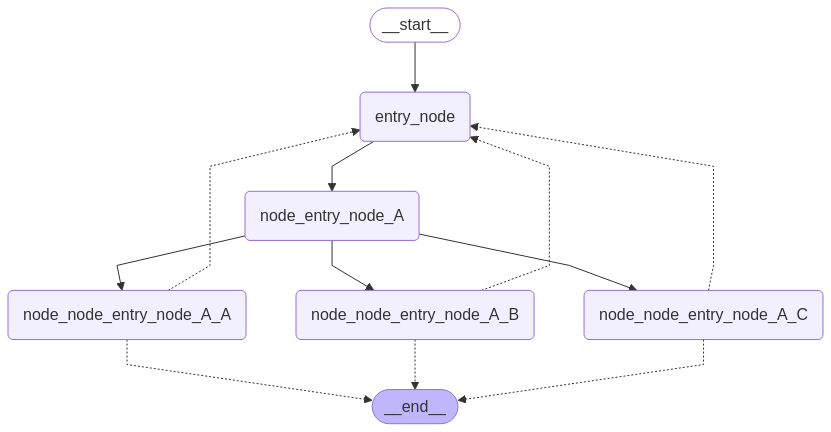

In [4]:
from IPython.display import Image, display
from langchain_core.runnables.graph import CurveStyle, MermaidDrawMethod, NodeStyles

display(
    Image(
        app.get_graph().draw_mermaid_png(
            draw_method=MermaidDrawMethod.API,
        )
    )
)

#### Mermaid + pyppeteer 사용

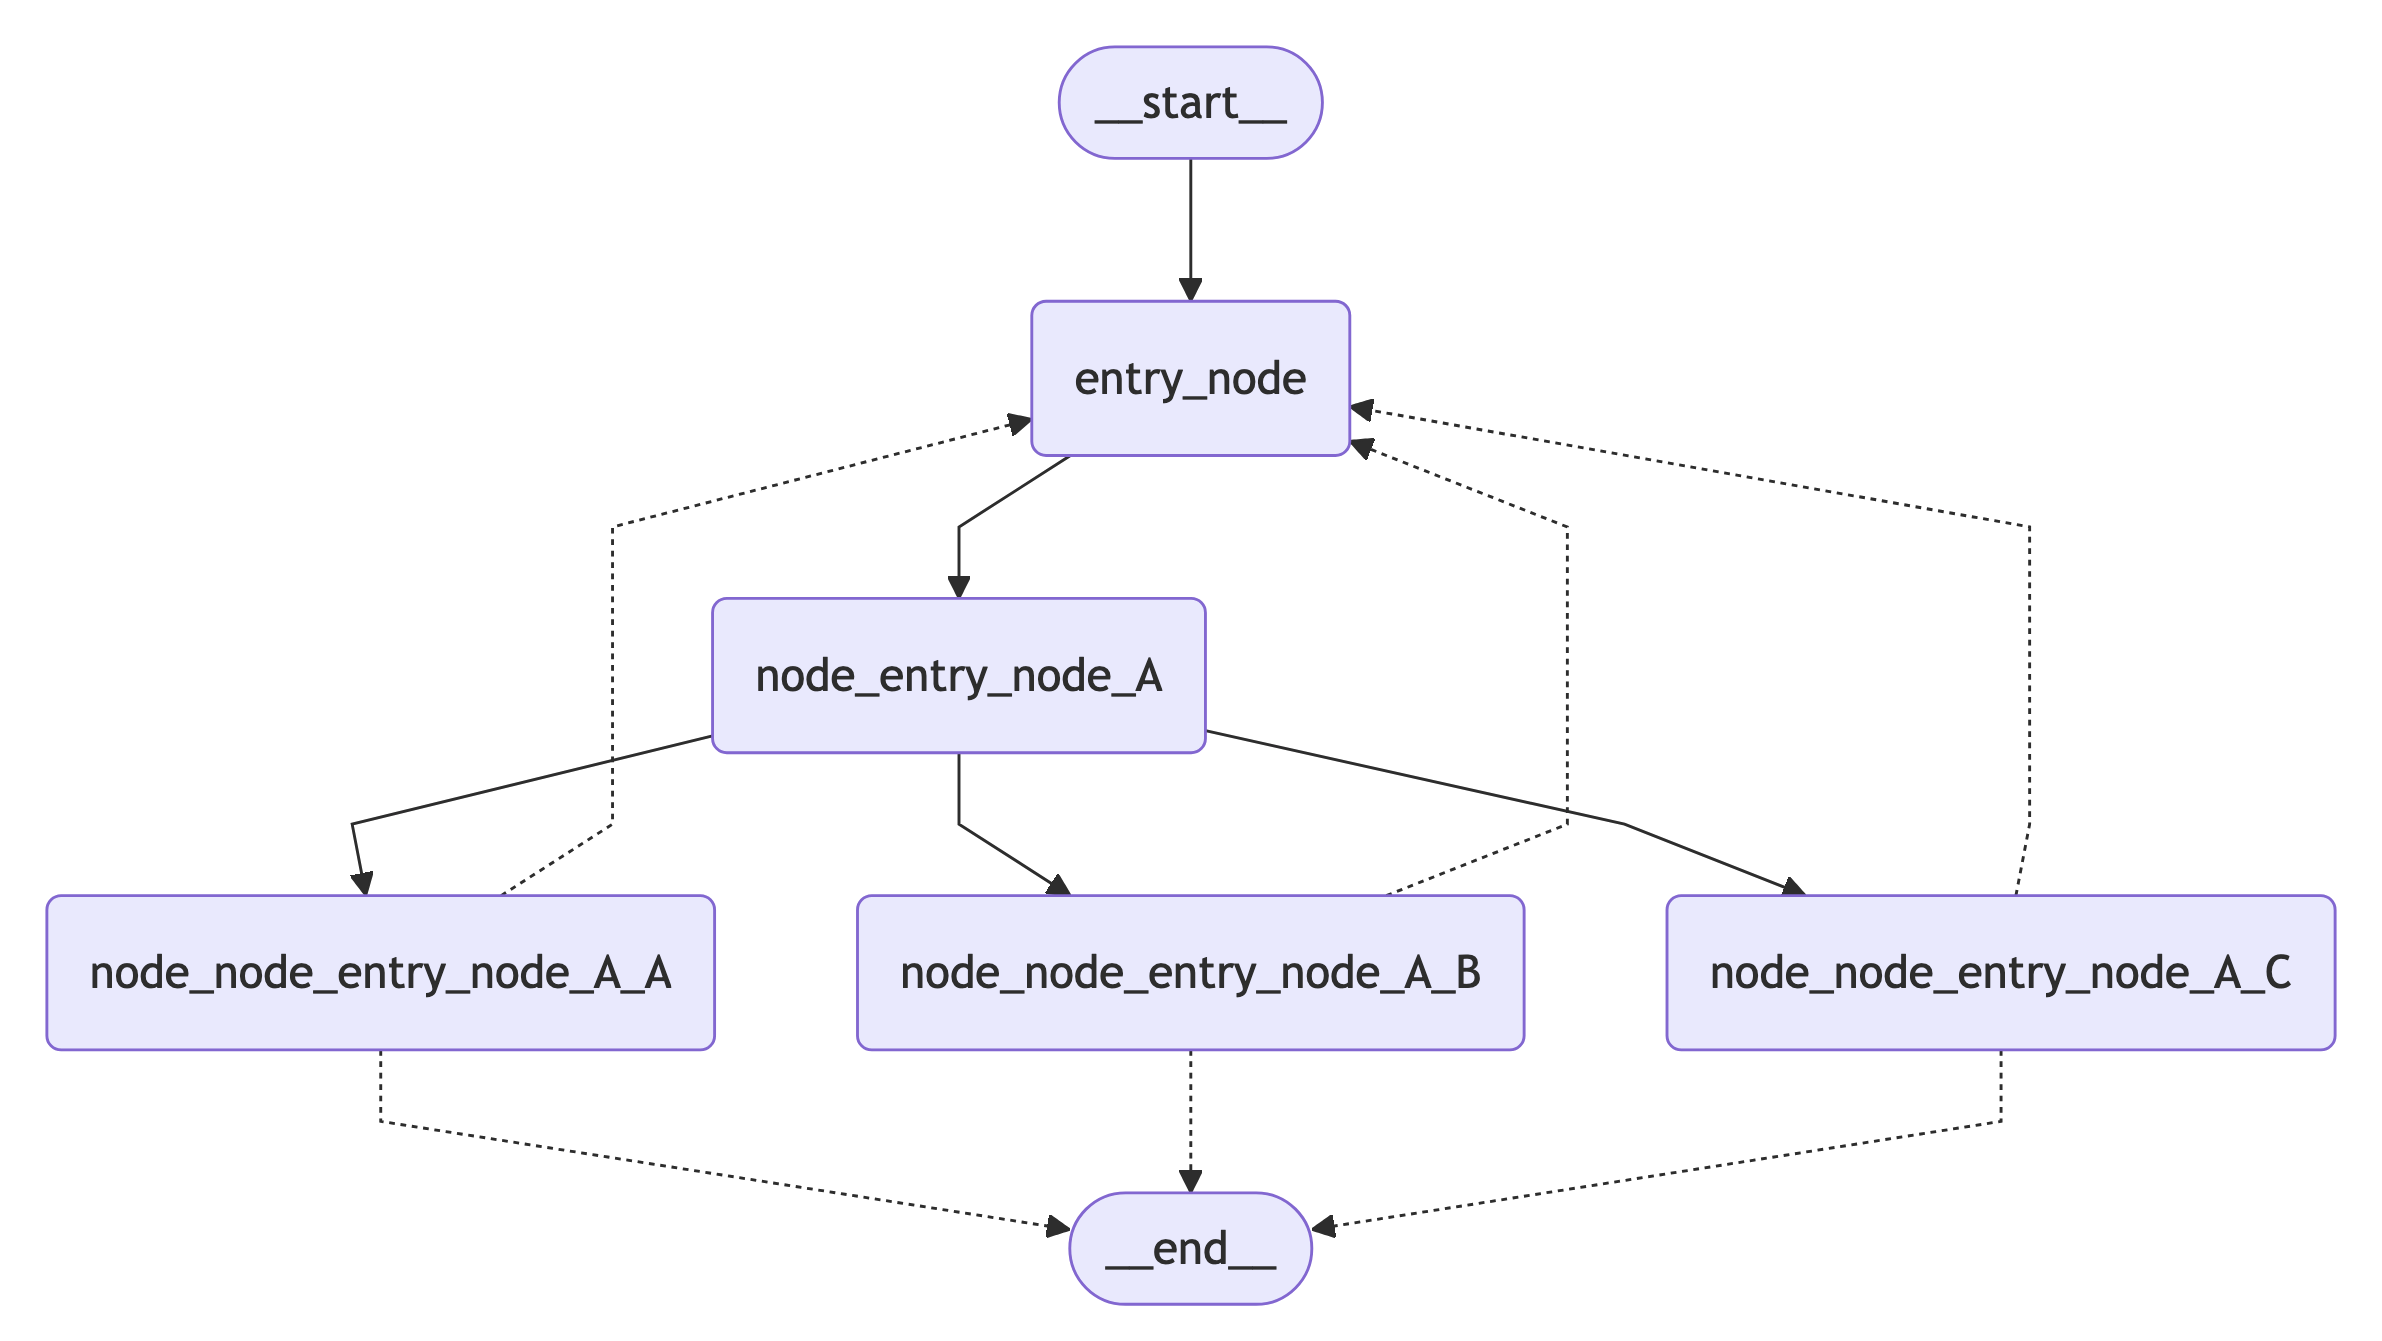

In [5]:
import nest_asyncio

nest_asyncio.apply()  # Required for Jupyter Notebook to run async functions

display(
    Image(
        app.get_graph().draw_mermaid_png(
            curve_style=CurveStyle.LINEAR,
            node_colors=NodeStyles(first="#ffdfba", last="#baffc9", default="#fad7de"),
            wrap_label_n_words=9,
            output_file_path=None,
            draw_method=MermaidDrawMethod.PYPPETEER,
            background_color="white",
            padding=10,
        )
    )
)

#### Graphviz 사용

In [6]:
# try:
#     display(Image(app.get_graph().draw_png()))
# except ImportError:
#     print(
#         "You likely need to install dependencies for pygraphviz, see more here https://github.com/pygraphviz/pygraphviz/blob/main/INSTALL.txt"
#     )

You likely need to install dependencies for pygraphviz, see more here https://github.com/pygraphviz/pygraphviz/blob/main/INSTALL.txt
